<a href="https://colab.research.google.com/github/SushanthKumble/DATASCIENCE/blob/main/SVM(SVC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE LAB/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

To apply a non-linear SVM classifier, you can make the following changes to your code:

Change the kernel parameter of the SVC to a non-linear kernel. The linear kernel assumes a linear decision boundary, but for non-linear data, you can use kernels like 'rbf' (Radial Basis Function), 'poly' (polynomial), or 'sigmoid'.

Update the random_state parameter if desired.


In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [11]:
cm

array([[66,  2],
       [ 8, 24]])

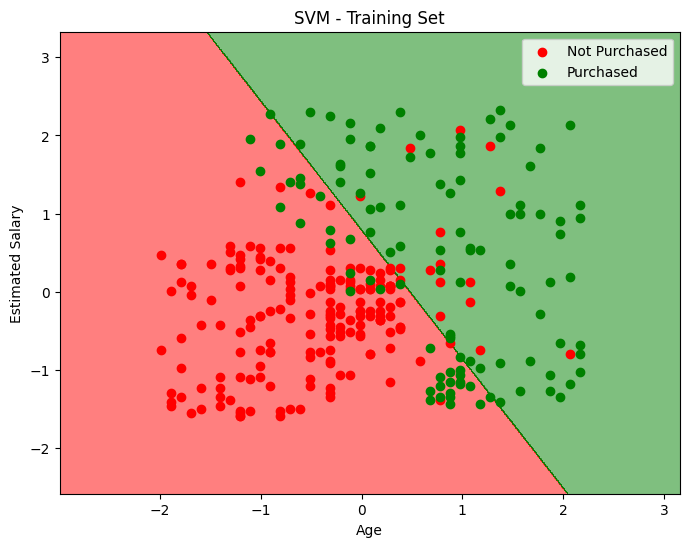

In [12]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap

# Create a meshgrid to plot the decision boundary
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))

# Use the classifier to predict the class labels for each point in the meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a color map for the plot
cmap = ListedColormap(('red', 'green'))

# Plot the training set data points
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap)
plt.scatter(X_train[y_train == 0, 0], X_e[y_train == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color = 'green', label = 'Purchased')
plt.title('SVM - Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



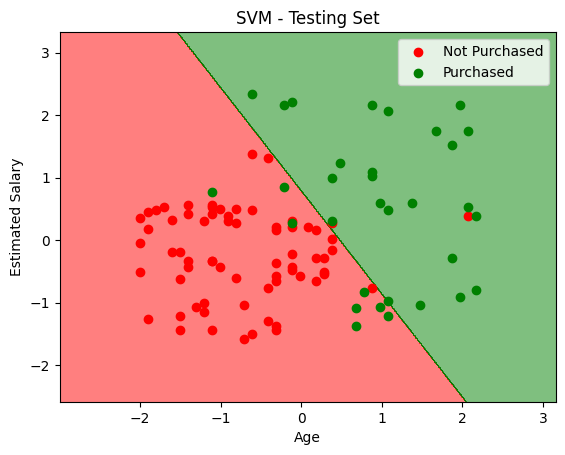

In [19]:
# Visualizing the Testing set results
from matplotlib.colors import ListedColormap

# Create a meshgrid of feature values
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))

# Use the trained classifier to make predictions on the meshgrid points
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a colormap for the two classes
cmap = ListedColormap(('red', 'green'))

# Plot the contour filled by the predictions
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap)

# Scatter plot the actual data points
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color = 'green', label = 'Purchased')

# Add labels and legend
plt.title('SVM - Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()


In [15]:
from sklearn.metrics import accuracy_score
print ('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.9
